# Individual EDA

- Separate the states into 4 regions: Western, southern, eastern and northern.
- Filter data based on assigned regions and explore with support from visualization
- North East and South is the main focus in this EDA.

___

## Data Filtering

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [2]:
# Load 4 parts of raw data on State Names
state_df = pf.load_and_process_many("../../data/raw/state")

# Note that the project_fuctions module includes list of abbreviations for states separated in regions
# Let's slice out only the north east and south
n_df = state_df.loc[state_df["State"].isin(pf.NORTH_EAST)].reset_index(drop=True)
s_df = state_df.loc[state_df["State"].isin(pf.SOUTH)].reset_index(drop=True)


In [3]:
s_df # North East region data set

,Name,Year,Gender,State,Count
0,Mary,1910,F,AL,875
1,Annie,1910,F,AL,482
2,Willie,1910,F,AL,257
3,Mattie,1910,F,AL,232
4,Ruby,1910,F,AL,204
...,...,...,...,...,...
2173016,Pierce,2014,M,WV,5
2173017,Quinton,2014,M,WV,5
2173018,Reece,2014,M,WV,5
2173019,Sterling,2014,M,WV,5


In [4]:
n_df# South region data set

,Name,Year,Gender,State,Count
0,Mary,1910,F,CT,304
1,Helen,1910,F,CT,170
2,Anna,1910,F,CT,131
3,Margaret,1910,F,CT,99
4,Dorothy,1910,F,CT,90
...,...,...,...,...,...
1077883,Richard,2014,M,VT,5
1077884,Rowan,2014,M,VT,5
1077885,Simon,2014,M,VT,5
1077886,Skyler,2014,M,VT,5


___

## Initial inspection

Let's have a general of the data set for each region.

### North East region

In [5]:
n_df.shape

(1077888, 5)

For the North East, we see that there are **more than 1 million collected record** and **5 variable for each observation**. 

In [6]:
n_df.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

Indeed, we have 5 variables for each observation. **The state column is not important since we care only about regions.**

In [7]:
n_df.describe(include=[object]).T

,count,unique,top,freq
Name,1077888,15817,John,1515
Gender,1077888,2,F,611881
State,1077888,11,NY,277809


For categorial data:

- We see that there are 3 categorical variable in the dataframe with other 2 numerical variable (Year and Count)
- Here, we can see that are 15817 unique names in this region
- There are 11 states recorded that equal to total number of states in this region. This means all states participates in this survey.
- It is not clear whether John is the most popular all of times since we also have a count column

In [8]:
n_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1077888.0,1972.568780,29.206224,1910.0,1951.0,1977.0,1998.0,2014.0
Count,1077888.0,64.282026,244.034990,5.0,7.0,13.0,36.0,10023.0


Summary on numerical values do not give any useful information. 

### South region

In [9]:
s_df.shape

(2173021, 5)

For the South, we see that there are **more than 2 million collected record** and **5 variable for each observation**.

In [10]:
# We have 5 variables for each observation
s_df.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

This is similar to that of North East region.

In [11]:
s_df.describe(include=[object]).T

,count,unique,top,freq
Name,2173021,20860,Jessie,2991
Gender,2173021,2,F,1196486
State,2173021,17,TX,324133


For categorial data:

- We see that there are 3 categorical variable in the dataframe with other 2 numerical variable (Year and Count)
- Here, we can see that are 20860 unique names in this region
- There are 17 states recorded that equal to total number of states in this region. This means all states participates in this survey
- It is not clear whether Jessie is the most popular all of times since we also have a count column

In [12]:
s_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2173021.0,1970.950681,30.260875,1910.0,1946.0,1975.0,1998.0,2014.0
Count,2173021.0,47.601974,134.264750,5.0,7.0,13.0,34.0,5060.0


Summary on numerical values do not give any useful information.
___

## Analysis

### Research Question

- RQ1: What are the top 5 most occuring name of all times? What are the top 5 name of all times in each gender? How is the list different between 2 regions?

- RQ2: How is proportion of top 5 change from 1910 to 2014 in North East and South region?

### Top 5 of all times in South and North

We start by aggregating sum of counts of every name in each region for all years.

In [13]:
# For the north east
n_name = (n_df.groupby(by="Name")
              .aggregate("sum")
              .drop(columns=["Year"]) # We do not analyze with time
              .sort_values(by="Count")
              .reset_index()
         )
top5_n,low5_n = n_name.tail().reset_index(drop=True).sort_index(ascending=False), n_name.head()

# For the south
s_name = (s_df.groupby(by="Name")
              .aggregate("sum")
              .drop(columns=["Year"]) # We do not analyze with time
              .sort_values(by="Count")
              .reset_index()
         )
top5_s,low5_s = s_name.tail().reset_index(drop=True).sort_index(ascending=False), n_name.head()

Now, we can build plots. In this case, for counting the number of occurence for each discrete entry, bar plots is ideal.

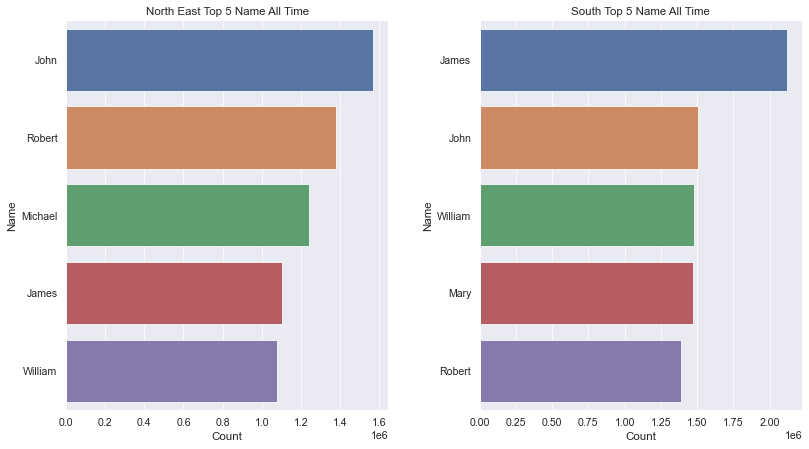

In [116]:
# Check similarity between 2 regions
sns.set_theme(context="paper", style="darkgrid",  font_scale=1.2, )


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top5_n,
            order=top5_n["Name"],
            ax=ax[0]
            )
north.set_title("North East Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top5_s,
            order=top5_s["Name"],
            ax=ax[1])
south.set_title("South Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

#### Observations

- We can see that top 5 in these 2 regions are quite similar with the appearance of **James, William, Robert and John**. They differ in that North has **Michael** in top 5 while **Mary** replaces Michael in the South.

- All names in top 5 list in both region pass the mark of **1 million** count of all time. Maximum count in the *North East* is almost **1.6 millions** while that of the *South* surpasses **2 millions**.

- In the **North East** region, **John is the most popular name all times**, followed by Robert. James is at the last of the list.

- In the **South region**, however, **James appears to the most popular name of all times**, followed by John, who takes the top in the South.



### Top 5 of all times of each gender South and North

We start by filtering out data set based on gender.

In [88]:
# Function for filter data based on gender
def get_top_5(data, region, gender):
    return (data.groupby(by="Name")
                   .agg(np.sum)
                   .sort_values(by="Count", ascending=False)
                   .head()
                   .drop(columns="Year") # We do not care about year
                   .assign(Region=lambda n: [region for _ in n["Count"]], Gender=lambda n: [gender for _ in n["Count"]])
                   .reset_index()
            )

# In the North East
top5_male_n, top5_female_n = (get_top_5(n_df.loc[n_df["Gender"] == "M"], "NE", "M"), 
                              get_top_5(n_df.loc[n_df["Gender"] == "F"], "NE", "F")
                             )

# In the South
top5_male_s, top5_female_s = (get_top_5(s_df.loc[s_df["Gender"] == "M"], "S", "M"), 
                              get_top_5(s_df.loc[s_df["Gender"] == "F"], "S", "F")
                             )

# gender_df = pd.concat([top5_male_n, top5_female_n,top5_male_s, top5_female_s], axis=0)
# gender_df 
top5_male_s

,Name,Count,Region,Gender
0,James,2106758,S,M
1,John,1500823,S,M
2,William,1472427,S,M
3,Robert,1384250,S,M
4,Michael,1199859,S,M


Now, we can plot. In this case, we will will bar plot to indicate counts and FacetGrid as way to categorize plot based on region and gender

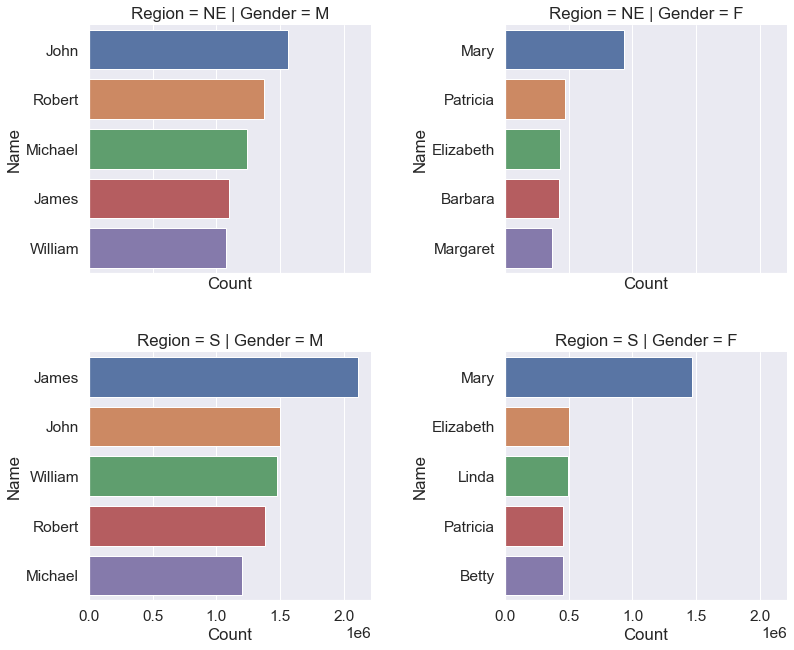

In [131]:
sns.set_theme(style="darkgrid", font_scale=1.4)
fig,ax= plt.subplots(2,2, figsize=(12,10), sharex=True)

data_list = [[top5_male_n,top5_female_n],[top5_male_s,top5_female_s]]   
def draw_gender_plot(axes, data_list, result_axes=None):
    if result_axes is None:
        result_axes = list()
    for i in range(2):
        for j in range(2):
            data = data_list[i][j]
            ax_ij = sns.barplot(x="Count",
                          y="Name",
                          data=data,
                          ax=ax[i][j]
                         )
            region, gender =data["Region"][0], data["Gender"][0]
            ax_ij.set_title(f"Region = {region} | Gender = {gender}")
            result_axes.append(ax_ij)
            
    return result_axes

ax = draw_gender_plot(ax, data_list)
sns.despine()
fig.tight_layout(pad=2.5)
plt.show()


#### Observation

- Something to do tomorrow

### Proportion trend of top 5 in 1910 until 2014

Let's find the proportion of each name in top 5 (in 1910) in the total count for every subsequential year.

In [138]:
# Find top 5 in 1910 in the North East
top5_1910_n = (n_df.loc[n_df["Year"] == 1910]
                   .groupby(by="Name").agg(np.sum)
                   .drop(columns="Year")
                   .sort_values(by="Count", ascending=False)
                   .head()
                   .index
              )
top5_1910_n


# Pivot table of Years vs Name (top 5)
n_year = (n_df.loc[n_df["Name"].isin(top5_1910_n)]
              .pivot_table(index="Year",columns="Name",values="Count", aggfunc=np.sum)
          )
# Find the total count in each year
y = n_df.groupby(by="Year").agg(np.sum)
for year in range(1910, 2015):
    n_year.loc[year,:] = n_year.loc[year,:]/y.loc[year,"Count"]
n_year

Name,Anna,Helen,John,Margaret,Mary
Year,,,,,
1910,0.024725,0.031357,0.027311,0.024524,0.053919
1911,0.021152,0.028852,0.030803,0.022667,0.049495
1912,0.017939,0.025133,0.034826,0.018846,0.042198
1913,0.017702,0.025266,0.036107,0.018470,0.041729
1914,0.016942,0.024356,0.036906,0.017929,0.040675
...,...,...,...,...,...
2010,0.002299,0.000241,0.004866,0.000729,0.000925
2011,0.002087,0.000208,0.004915,0.000672,0.000729
2012,0.002131,0.000268,0.004461,0.000720,0.000739


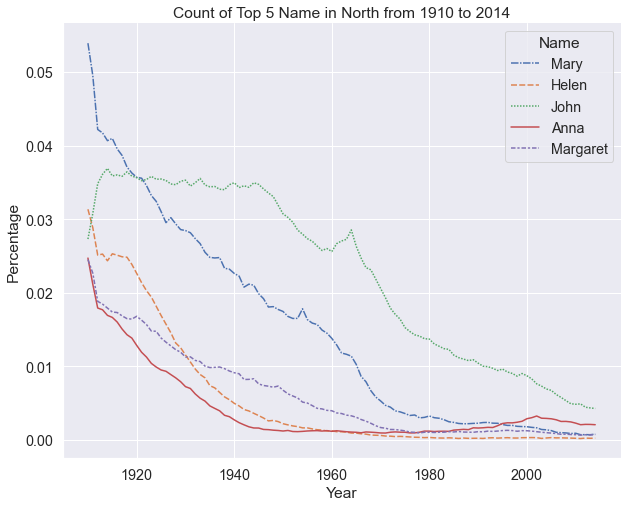

In [146]:
# Setting themes
sns.set_theme(style="darkgrid", font_scale=1.3, )
plt.figure(figsize=(10,8))
n_plot = sns.lineplot(data=n_year, 
                      hue_order=top5_1910_n,
                     )
n_plot.set(ylabel="Percentage", 
           title="Count of Top 5 Name in North from 1910 to 2014",
           )
sns.despine()
plt.show()

In [143]:
# Find top 5 in 1910 in the North East
top5_1910_s = (s_df.loc[s_df["Year"] == 1910]
                   .groupby(by="Name").agg(np.sum)
                   .drop(columns="Year")
                   .sort_values(by="Count", ascending=False)
                   .head()
                   .index
              )
top5_1910_s


# Pivot table of Years vs Name (top 5)
s_year = (s_df.loc[s_df["Name"].isin(top5_1910_s)]
              .pivot_table(index="Year",columns="Name",values="Count", aggfunc=np.sum)
          )
# Find the total count in each year
y = s_df.groupby(by="Year").agg(np.sum)
for year in range(1910, 2015):
    s_year.loc[year,:] = s_year.loc[year,:]/y.loc[year,"Count"]
s_year

Name,James,John,Mary,William,Willie
Year,,,,,
1910,0.024718,0.020511,0.042154,0.018469,0.019675
1911,0.025696,0.020962,0.041032,0.020228,0.017547
1912,0.028878,0.023969,0.035758,0.023514,0.016500
1913,0.030216,0.024513,0.035394,0.024571,0.015381
1914,0.031240,0.024852,0.034553,0.024684,0.015504
...,...,...,...,...,...
2010,0.004878,0.004274,0.001181,0.006337,0.000189
2011,0.004620,0.003974,0.001170,0.006529,0.000189
2012,0.004762,0.003879,0.001087,0.006325,0.000176


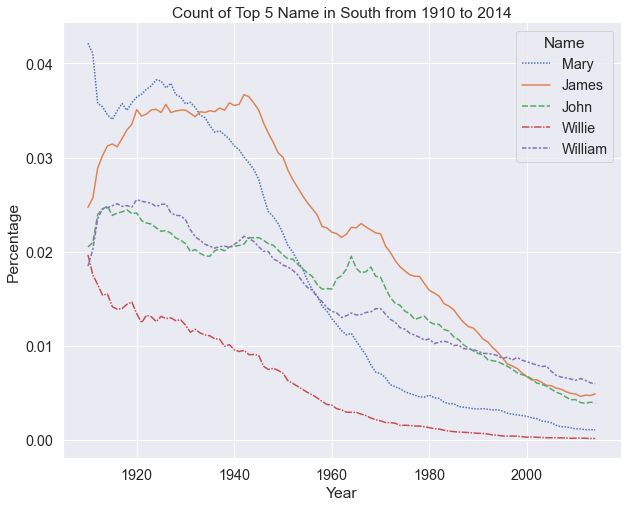

In [145]:
# Setting themes
sns.set_theme(style="darkgrid", font_scale=1.3, )
plt.figure(figsize=(10,8))
s_plot = sns.lineplot(data=s_year, 
                      hue_order=top5_1910_s,
                     )
s_plot.set(ylabel="Percentage", 
           title="Count of Top 5 Name in South from 1910 to 2014",
           )
sns.despine()
plt.show()

#### Observations

- To do tmr!